У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Data/yulu_rental.csv')

1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

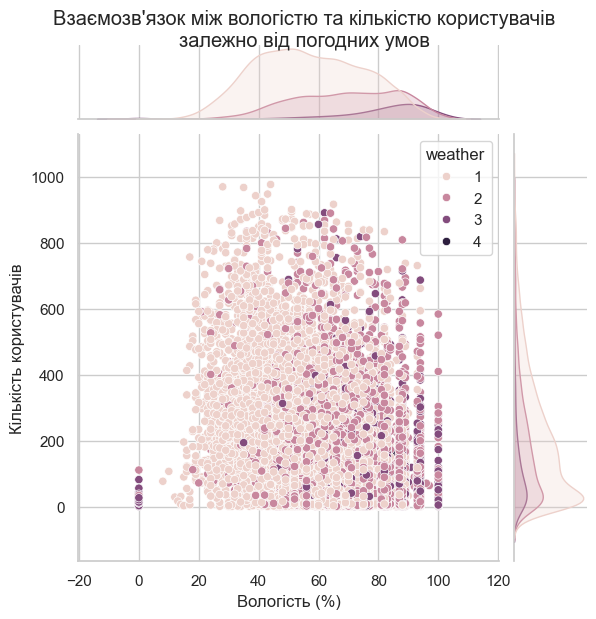

In [20]:
# Створення графіку розсіювання з кольорами залежно від weather
sns.set(style="whitegrid")

# Візуалізація графіку
g = sns.jointplot(data=df, x='humidity', y='count', hue='weather', kind='scatter')

g.fig.suptitle('Взаємозв\'язок між вологістю та кількістю користувачів\nзалежно від погодних умов', y=1.03)
g.set_axis_labels('Вологість (%)', 'Кількість користувачів')
plt.show()

Така візуалізація дозволяє легко визначити вплив погодних умов і вологості на кількість активностей, що може допомогти в оптимізації ресурсів або 
плануванні бізнес-стратегій на основі погодних даних.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

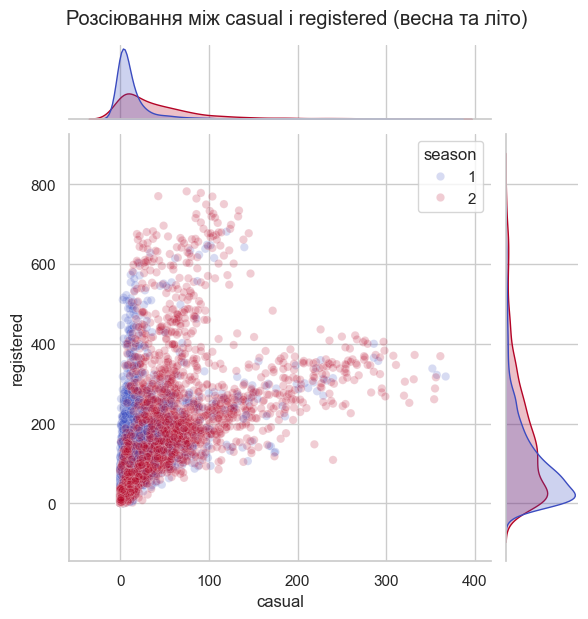

In [29]:
filtered_df = df[df['season'].isin([1, 2])]

# Візуалізація графіка розсіювання з кольором для змінної season і прозорістю 0.2
sns.set(style="whitegrid")
g = sns.jointplot(data=filtered_df, x='casual', y='registered', hue='season', palette='coolwarm', kind='scatter', alpha=0.2)

g.fig.suptitle('Розсіювання між casual і registered (весна та літо)', y=1.03)
plt.show()

Спостереження:
1. Точки на графіку покажуть, як співвідносяться між собою випадкові (casual) і зареєстровані (registered) користувачі у весняний та літній сезони.
   Якщо на графіку присутні чіткі кластери точок, це може свідчити про схожі закономірності поведінки користувачів у певних умовах.
2. Кольори точок, відповідні весні та літу, допоможуть візуалізувати різницю в поведінці користувачів залежно від сезону. Наприклад, у літні місяці може бути більше випадкових користувачів.
3. Прозорість точок (0.2) дозволяє уникнути перевантаження графіка при великій кількості точок і дає змогу краще побачити перекриття.

Для прийняття рішень:
1. Якщо влітку суттєво більше випадкових користувачів порівняно з весною, це може бути сигналом для проведення літніх акцій для залучення випадкових клієнтів.
2. Взаємозв'язок між випадковими і зареєстрованими користувачами дозволяє зрозуміти, чи зростає кількість зареєстрованих користувачів зі збільшенням випадкових. Це може впливати на стратегію залучення нових клієнтів.

Така візуалізація допоможе краще зрозуміти сезонні коливання в поведінці користувачів і може стати корисною при плануванні маркетингових кампаній або управлінні ресурсами.

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


Text(0, 0.5, 'Humidity')

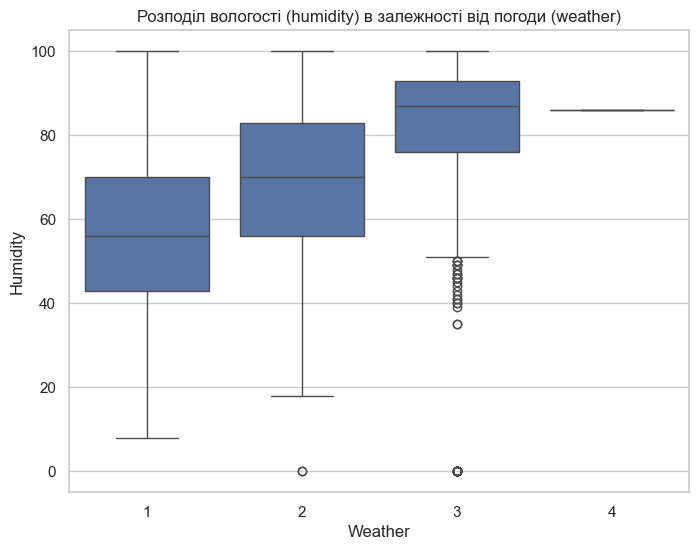

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='weather', y='humidity', data=df)

plt.title('Розподіл вологості (humidity) в залежності від погоди (weather)')
plt.xlabel('Weather')
plt.ylabel('Humidity')

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

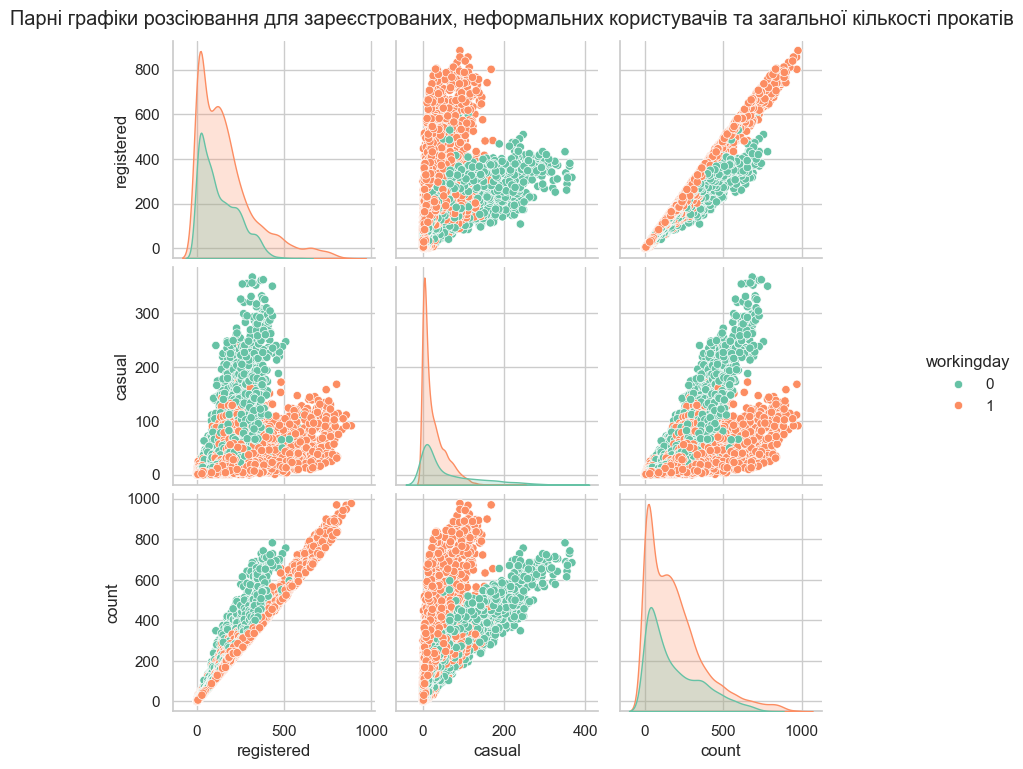

In [31]:
selected_columns = df[['registered', 'casual', 'count', 'workingday']]

# Побудова парних графіків (pairplot)
sns.pairplot(data=selected_columns, hue='workingday', palette='Set2')

plt.suptitle('Парні графіки розсіювання для зареєстрованих, неформальних користувачів та загальної кількості прокатів', y=1.02)
plt.show()

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [33]:
# Перетворення колонки 'datetime' на тип pandas datetime
df['datetime'] = pd.to_datetime(df['datetime'])

print(df['datetime'].dtypes)

datetime64[ns]


 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [34]:
df['date'] = df.datetime.dt.date

<Figure size 800x600 with 0 Axes>

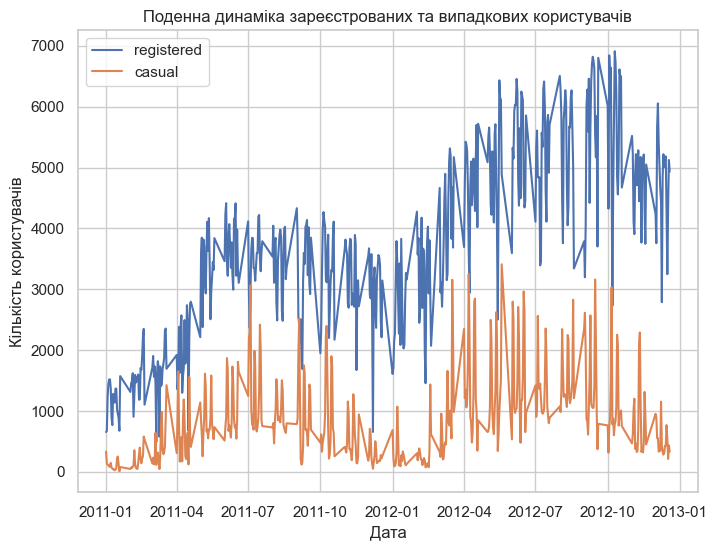

In [48]:
# Створюємо нову змінну df_viz з потрібними колонками
df_viz = df[['date', 'registered', 'casual']]

# Групуємо дані за колонкою 'date' та сумуємо кількість користувачів за кожен день
df_viz = df_viz.groupby('date').sum().reset_index()

# Візуалізуємо поденну динаміку зареєстрованих і випадкових користувачів
plt.figure(figsize=(8, 6))
df_viz.plot(x='date', y=['registered', 'casual'], kind='line', figsize=(8, 6), title='Поденна динаміка зареєстрованих та випадкових користувачів')

plt.title('Поденна динаміка зареєстрованих та випадкових користувачів')
plt.xlabel('Дата')
plt.ylabel('Кількість користувачів')
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
